In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn

In [3]:
data = datasets.load_boston() ## loads Boston dataset from datasets library

In [37]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [38]:
import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

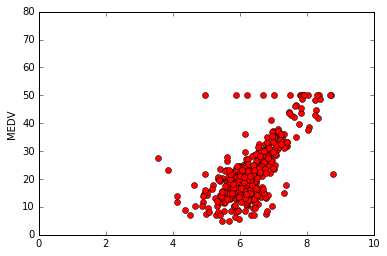

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.plot(df["RM"], target["MEDV"], 'ro')
plt.axis([0, 10, 0, 80])
plt.ylabel('MEDV')
plt.show()

In [ ]:
#Get rid of outliers


In [94]:
## Without a constant

import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          3.74e-256
Time:                        14:45:35   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000         3.548     3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note: the R-squared value here is not the same without intercept
https://stats.stackexchange.com/questions/267325/why-does-statsmodels-api-ols-over-report-the-r-squared-value

In [67]:
model.cov_HC0

array([[  2.92004627e+01,  -4.13701475e+00,  -2.56292961e-01],
       [ -4.13701475e+00,   5.94625676e-01,   3.27505845e-02],
       [ -2.56292961e-01,   3.27505845e-02,   4.06318653e-03]])

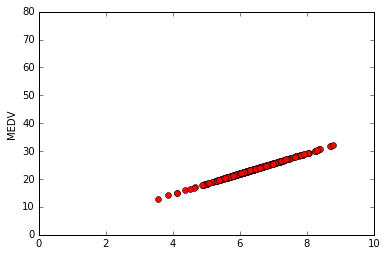

In [95]:
plt.plot(df["RM"], predictions, 'ro')
plt.axis([0, 10, 0, 80])
plt.ylabel('MEDV')
plt.show()

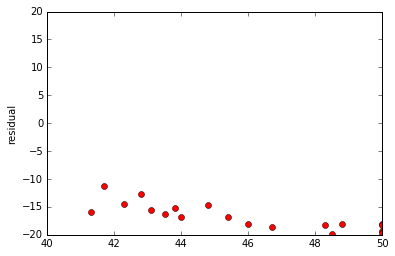

In [96]:
residual = predictions - y

plt.plot(y, residual, 'ro')
plt.axis([40, 50, -20, 20])
plt.ylabel('residual')
plt.show()

In [100]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y, predictions)
coefficient_of_dermination

0.30809118062585639

In [101]:
X = df["RM"] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           2.49e-74
Time:                        14:53:29   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, predictions)

43.600551771169563

In [102]:
coefficient_of_dermination = r2_score(y, predictions)
coefficient_of_dermination

0.48352545599133423

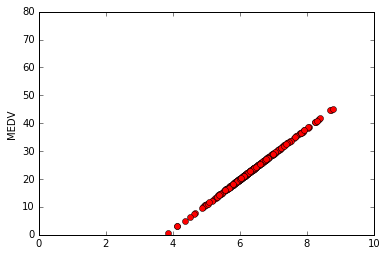

In [58]:
plt.plot(df["RM"], predictions, 'ro')
plt.axis([0, 10, 0, 80])
plt.ylabel('MEDV')
plt.show()

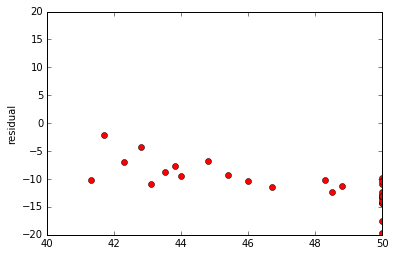

In [70]:
residual = predictions - y

plt.plot(y, residual, 'ro')
plt.axis([40, 50, -20, 20])
plt.ylabel('residual')
plt.show()

In [60]:
X = df[["RM",'LSTAT']] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          7.01e-112
Time:                        14:08:43   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669        -7.592     4.875
RM             5.0948      0.444     11.463      0.000         4.222     5.968
LSTAT         -0.6424      0.044    -14.689      0.000        -0.728    -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
from math import sqrt

sqrt(mean_squared_error(y, predictions))

5.523809263298243

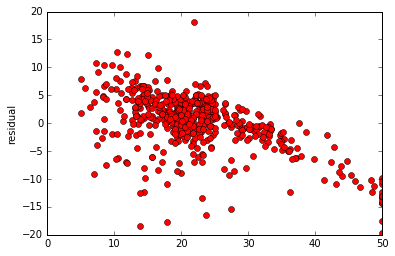

In [65]:
residual = predictions - y

plt.plot(y, residual, 'ro')
plt.axis([0, 50, -20, 20])
plt.ylabel('residual')
plt.show()

In [73]:
from sklearn.ensemble import RandomForestRegressor

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=6,
                                random_state=2)
regr_rf.fit(df, y)

# Predict on new data
y_rf = regr_rf.predict(df)

In [74]:
sqrt(mean_squared_error(y, y_rf))

1.9797575977162345

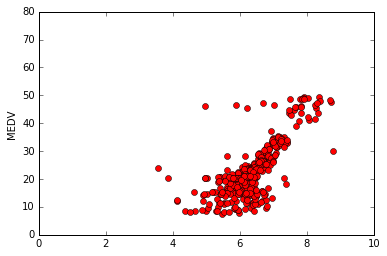

In [80]:
plt.plot(df["RM"], y_rf, 'ro')
plt.axis([0, 10, 0, 80])
plt.ylabel('MEDV')
plt.show()

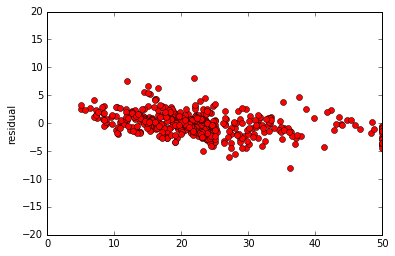

In [81]:
residual = y_rf - y

plt.plot(y, residual, 'ro')
plt.axis([0, 50, -20, 20])
plt.ylabel('residual')
plt.show()